In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import libraries for kmeans clustering model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
# Define a customized palette for future plots
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#D6B0CA"]
cmap = ListedColormap(pal)
palette = pal



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/7. Modeling - K-means Clustering/h4tf_kmeans.xlsx')
data.head()

In [ ]:
data.dtypes

In [ ]:
#Label for column Product Category, State
le = LabelEncoder()
data['Product_Category'] = le.fit_transform(data['Product_Category'])
data['State'] = le.fit_transform(data['State'])

In [ ]:
data.head()

In [ ]:
# data_kmean
data_kmean = data.copy()
cols_del = ['Customer_ID']
data_kmean = data_kmean.drop(cols_del, axis=1)
#Scaling all data using StandardScaler() for uniformity
scaler = StandardScaler()
scaler.fit(data_kmean)
scaled_data = pd.DataFrame(scaler.transform(data_kmean),columns= data_kmean.columns )
print("All features are now scaled")

In [ ]:
scaled_data.head()

##Kmeans using all dimensions

In [ ]:
kmeans = KMeans(random_state=0)
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

In [ ]:
# Xác định số lượng cụm tối ưu
k = 5 # Thay đổi giá trị này theo kết quả từ phương pháp Elbow hoặc Silhouette

# Xây dựng mô hình K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Gán nhãn cụm cho mỗi mẫu trong dữ liệu
data_kmean['Cluster'] = kmeans.labels_

print(data_kmean.head(15))
print(data_kmean['Cluster'].unique())

In [ ]:
data['Clusters'] = kmeans.labels_

In [ ]:
data.head()

In [ ]:
#Plotting Total Spending 10
plt.figure()
pl=sns.boxplot(y=data["total_spending_10"],x=data["Clusters"], palette= pal)
pl.set_title("total_spending_10")
plt.show()

In [ ]:
#Plotting Total Spending 11
plt.figure()
pl=sns.boxplot(y=data["total_spending_11"],x=data["Clusters"], palette= pal)
pl.set_title("total_spending_11")
plt.show()

In [ ]:
#Plotting Total Spending 12
plt.figure()
pl=sns.boxplot(y=data["total_spending_12"],x=data["Clusters"], palette= pal)
pl.set_title("total_spending_12")
plt.show()

<ipython-input-35-22af37927071>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxplot(y=data["total_purchase"],x=data["Clusters"], palette= pal)


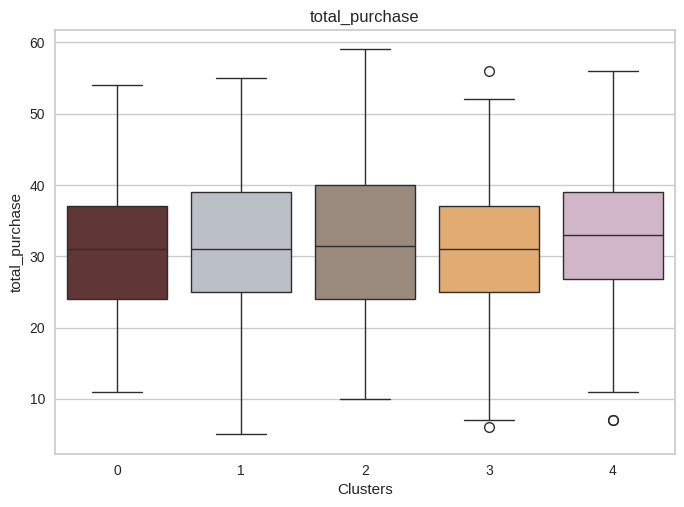

In [ ]:
#Plotting Total Purchase
plt.figure()
pl=sns.boxplot(y=data["total_purchase"],x=data["Clusters"], palette= pal)
pl.set_title("total_purchase")
plt.show()